# 01 Data Preprocessing & Visualization

### 1. Transfer the data from json file into csv files using the code from github provided by Yelp

### 2. Read the data using Pandas

#### (1) Read business.csv

In [340]:
import pandas as pd
import numpy as np

##### a. Deal with NaNs

In [341]:
#The path of data files, replace the path with your own path
#As we can see there are a lot of NaNs for attributes features, let's fix that problem first
df_business = pd.read_csv('C:/Users/ymp/Yelp_Business_Proj/business.csv')
df_business.head(2)

,attributes.Ambience.divey,attributes.RestaurantsDelivery,attributes.DogsAllowed,postal_code,hours.Thursday,attributes.HairSpecializesIn.coloring,attributes.BestNights.sunday,attributes.BYOB,attributes.AgesAllowed,hours.Friday,...,attributes.Caters,attributes.RestaurantsReservations,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.vegan,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,NaN,NaN,NaN,85044,7:30-17:00,NaN,NaN,NaN,NaN,7:30-17:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,15317,9:00-20:00,True,NaN,NaN,NaN,9:00-16:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
#There are two values in the column, true and false, but where are those nans?
df_business['attributes.HairSpecializesIn.coloring'].value_counts()

True     1261
False     344
Name: attributes.HairSpecializesIn.coloring, dtype: int64

In [343]:
#Let's calculate the nans
df_business['attributes.HairSpecializesIn.coloring'].isna().sum()

172962

In [344]:
#fill those nans with 0
df_business['attributes.HairSpecializesIn.coloring'] = df_business['attributes.HairSpecializesIn.coloring'].fillna(0)

In [345]:
#Now we cleared all the nans in this column
df_business['attributes.HairSpecializesIn.coloring'].isna().sum()

0

In [346]:
#Wait a second, I want the True value to be '1'
df_business['attributes.HairSpecializesIn.coloring'].value_counts()

0       173306
True      1261
Name: attributes.HairSpecializesIn.coloring, dtype: int64

In [347]:
#Change the True value to '1'
df_business['attributes.HairSpecializesIn.coloring']=df_business['attributes.HairSpecializesIn.coloring'].astype('int')

In [348]:
#Now we got what we want
df_business['attributes.HairSpecializesIn.coloring'].value_counts()

0    173306
1      1261
Name: attributes.HairSpecializesIn.coloring, dtype: int64

In [349]:
#'attributes.AgesAllowed','attributes.Alcohol','attributes.NoiseLevel','attributes.RestaurantsAttire','attributes.RestaurantsPriceRange2','attributes.BYOBCorkage','attributes.WiFi','attributes.Smoking'
#columns above are not True or false values, we'll deal with them later
for col in ('attributes.Ambience.divey','attributes.RestaurantsDelivery','attributes.DogsAllowed','attributes.HairSpecializesIn.coloring','attributes.BestNights.sunday','attributes.BYOB','attributes.AgesAllowed','attributes.Alcohol','attributes.Ambience.classy','attributes.RestaurantsTableService','attributes.Ambience.touristy','attributes.RestaurantsCounterService','attributes.Corkage','attributes.RestaurantsGoodForGroups','attributes.BusinessAcceptsBitcoin','attributes.HappyHour','attributes.WheelchairAccessible','attributes.Ambience.hipster','attributes.BusinessAcceptsCreditCards','attributes.Music.video','attributes.Music.live','attributes.Music.background_music','attributes.BusinessParking.lot','attributes.Music.karaoke','attributes.ByAppointmentOnly','attributes.NoiseLevel','attributes.HairSpecializesIn.perms','attributes.DriveThru','attributes.HasTV','attributes.GoodForMeal.dinner','attributes.BusinessParking.street','attributes.RestaurantsAttire','attributes.BestNights.tuesday','attributes.DietaryRestrictions.vegetarian','attributes.AcceptsInsurance','attributes.BestNights.wednesday','attributes.HairSpecializesIn.kids','attributes.Open24Hours','attributes.Ambience.trendy','attributes.CoatCheck','attributes.HairSpecializesIn.straightperms','attributes.HairSpecializesIn.curly','attributes.Music.no_music','attributes.HairSpecializesIn.africanamerican','attributes.RestaurantsPriceRange2','attributes.Ambience.intimate','attributes.GoodForMeal.latenight','attributes.GoodForMeal.dessert','attributes.BusinessParking.validated','attributes.GoodForMeal.lunch','attributes.GoodForKids','attributes.DietaryRestrictions.soy-free','attributes.GoodForMeal.brunch','attributes.BusinessParking.valet','attributes.DietaryRestrictions.gluten-free','attributes.BYOBCorkage','attributes.BusinessParking.garage','attributes.BestNights.friday','attributes.Music.dj','attributes.HairSpecializesIn.extensions','attributes.BestNights.saturday','attributes.Ambience.casual','attributes.BestNights.thursday','attributes.BestNights.monday','attributes.HairSpecializesIn.asian','attributes.DietaryRestrictions.kosher','attributes.WiFi','attributes.Smoking','attributes.DietaryRestrictions.halal','attributes.GoodForDancing','attributes.GoodForMeal.breakfast','attributes.Caters','attributes.RestaurantsReservations','attributes.DietaryRestrictions.dairy-free','attributes.DietaryRestrictions.vegan','attributes.Ambience.romantic','attributes.Music.jukebox','attributes.Ambience.upscale','attributes.RestaurantsTakeOut','attributes.BikeParking','attributes.OutdoorSeating'):
        print(df_business[col].value_counts())

False    27192
True      1081
Name: attributes.Ambience.divey, dtype: int64
False    37012
True     12156
Name: attributes.RestaurantsDelivery, dtype: int64
False    8553
True     4061
Name: attributes.DogsAllowed, dtype: int64
0    173306
1      1261
Name: attributes.HairSpecializesIn.coloring, dtype: int64
False    5352
True     1367
Name: attributes.BestNights.sunday, dtype: int64
False    860
True      49
Name: attributes.BYOB, dtype: int64
21plus     217
18plus      89
19plus      66
allages     35
Name: attributes.AgesAllowed, dtype: int64
none             20038
full_bar         19440
beer_and_wine     6689
Name: attributes.Alcohol, dtype: int64
False    44014
True       952
Name: attributes.Ambience.classy, dtype: int64
True     26546
False    15086
Name: attributes.RestaurantsTableService, dtype: int64
False    44724
True       242
Name: attributes.Ambience.touristy, dtype: int64
True     247
False    150
Name: attributes.RestaurantsCounterService, dtype: int64
False    514
Tru

In [350]:
#For all the attributes features, let's use a function to replace all the nans, false and true values into 0 and 1
def data_replace_TF_01(data):
    for col in ('attributes.Ambience.divey','attributes.RestaurantsDelivery','attributes.DogsAllowed','attributes.HairSpecializesIn.coloring','attributes.BestNights.sunday','attributes.BYOB','attributes.Ambience.classy','attributes.RestaurantsTableService','attributes.Ambience.touristy','attributes.RestaurantsCounterService','attributes.Corkage','attributes.RestaurantsGoodForGroups','attributes.BusinessAcceptsBitcoin','attributes.HappyHour','attributes.WheelchairAccessible','attributes.Ambience.hipster','attributes.BusinessAcceptsCreditCards','attributes.Music.video','attributes.Music.live','attributes.Music.background_music','attributes.BusinessParking.lot','attributes.Music.karaoke','attributes.ByAppointmentOnly','attributes.HairSpecializesIn.perms','attributes.DriveThru','attributes.HasTV','attributes.GoodForMeal.dinner','attributes.BusinessParking.street','attributes.BestNights.tuesday','attributes.DietaryRestrictions.vegetarian','attributes.AcceptsInsurance','attributes.BestNights.wednesday','attributes.HairSpecializesIn.kids','attributes.Open24Hours','attributes.Ambience.trendy','attributes.CoatCheck','attributes.HairSpecializesIn.straightperms','attributes.Ambience.intimate','attributes.GoodForMeal.latenight','attributes.GoodForMeal.dessert','attributes.BusinessParking.validated','attributes.GoodForMeal.lunch','attributes.GoodForKids','attributes.DietaryRestrictions.soy-free','attributes.GoodForMeal.brunch','attributes.BusinessParking.valet','attributes.DietaryRestrictions.gluten-free','attributes.BusinessParking.garage','attributes.BestNights.friday','attributes.Music.dj','attributes.HairSpecializesIn.extensions','attributes.BestNights.saturday','attributes.Ambience.casual','attributes.BestNights.thursday','attributes.BestNights.monday','attributes.HairSpecializesIn.asian','attributes.DietaryRestrictions.kosher','attributes.DietaryRestrictions.halal','attributes.GoodForDancing','attributes.GoodForMeal.breakfast','attributes.Caters','attributes.RestaurantsReservations','attributes.DietaryRestrictions.dairy-free','attributes.DietaryRestrictions.vegan','attributes.Ambience.romantic','attributes.Music.jukebox','attributes.Ambience.upscale','attributes.RestaurantsTakeOut','attributes.BikeParking','attributes.OutdoorSeating'):
        df_business[col] = df_business[col].fillna(0)
        df_business[col]=df_business[col].astype('int')
    return data

In [351]:
#Now, let's replace all the NaNs and False value into '0' and True value into '1' for all the attributes features
df_business = data_replace_TF_01(df_business)
df_business.head(2)

,attributes.Ambience.divey,attributes.RestaurantsDelivery,attributes.DogsAllowed,postal_code,hours.Thursday,attributes.HairSpecializesIn.coloring,attributes.BestNights.sunday,attributes.BYOB,attributes.AgesAllowed,hours.Friday,...,attributes.Caters,attributes.RestaurantsReservations,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.vegan,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,0,0,0,85044,7:30-17:00,0,0,0,NaN,7:30-17:00,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,15317,9:00-20:00,1,0,0,NaN,9:00-16:00,...,0,0,0,0,0,0,0,0,0,0


In [352]:
#Let's view the result for T/F attributes
for col in ('attributes.Ambience.divey','attributes.RestaurantsDelivery','attributes.DogsAllowed','attributes.HairSpecializesIn.coloring','attributes.BestNights.sunday','attributes.BYOB','attributes.Ambience.classy','attributes.RestaurantsTableService','attributes.Ambience.touristy','attributes.RestaurantsCounterService','attributes.Corkage','attributes.RestaurantsGoodForGroups','attributes.BusinessAcceptsBitcoin','attributes.HappyHour','attributes.WheelchairAccessible','attributes.Ambience.hipster','attributes.BusinessAcceptsCreditCards','attributes.Music.video','attributes.Music.live','attributes.Music.background_music','attributes.BusinessParking.lot','attributes.Music.karaoke','attributes.ByAppointmentOnly','attributes.HairSpecializesIn.perms','attributes.DriveThru','attributes.HasTV','attributes.GoodForMeal.dinner','attributes.BusinessParking.street','attributes.BestNights.tuesday','attributes.DietaryRestrictions.vegetarian','attributes.AcceptsInsurance','attributes.BestNights.wednesday','attributes.HairSpecializesIn.kids','attributes.Open24Hours','attributes.Ambience.trendy','attributes.CoatCheck','attributes.HairSpecializesIn.straightperms','attributes.Ambience.intimate','attributes.GoodForMeal.latenight','attributes.GoodForMeal.dessert','attributes.BusinessParking.validated','attributes.GoodForMeal.lunch','attributes.GoodForKids','attributes.DietaryRestrictions.soy-free','attributes.GoodForMeal.brunch','attributes.BusinessParking.valet','attributes.DietaryRestrictions.gluten-free','attributes.BusinessParking.garage','attributes.BestNights.friday','attributes.Music.dj','attributes.HairSpecializesIn.extensions','attributes.BestNights.saturday','attributes.Ambience.casual','attributes.BestNights.thursday','attributes.BestNights.monday','attributes.HairSpecializesIn.asian','attributes.DietaryRestrictions.kosher','attributes.DietaryRestrictions.halal','attributes.GoodForDancing','attributes.GoodForMeal.breakfast','attributes.Caters','attributes.RestaurantsReservations','attributes.DietaryRestrictions.dairy-free','attributes.DietaryRestrictions.vegan','attributes.Ambience.romantic','attributes.Music.jukebox','attributes.Ambience.upscale','attributes.RestaurantsTakeOut','attributes.BikeParking','attributes.OutdoorSeating'):
        print(df_business[col].value_counts())
        print('NaNs: ',df_business[col].isna().sum())

0    173486
1      1081
Name: attributes.Ambience.divey, dtype: int64
NaNs:  0
0    162411
1     12156
Name: attributes.RestaurantsDelivery, dtype: int64
NaNs:  0
0    170506
1      4061
Name: attributes.DogsAllowed, dtype: int64
NaNs:  0
0    173306
1      1261
Name: attributes.HairSpecializesIn.coloring, dtype: int64
NaNs:  0
0    173200
1      1367
Name: attributes.BestNights.sunday, dtype: int64
NaNs:  0
0    174518
1        49
Name: attributes.BYOB, dtype: int64
NaNs:  0
0    173615
1       952
Name: attributes.Ambience.classy, dtype: int64
NaNs:  0
0    148021
1     26546
Name: attributes.RestaurantsTableService, dtype: int64
NaNs:  0
0    174325
1       242
Name: attributes.Ambience.touristy, dtype: int64
NaNs:  0
0    174320
1       247
Name: attributes.RestaurantsCounterService, dtype: int64
NaNs:  0
0    174426
1       141
Name: attributes.Corkage, dtype: int64
NaNs:  0
0    129298
1     45269
Name: attributes.RestaurantsGoodForGroups, dtype: int64
NaNs:  0
0    174284
1     

In [353]:
#'attributes.AgesAllowed'
print(df_business['attributes.AgesAllowed'].value_counts())
print("NaNs:",df_business['attributes.AgesAllowed'].isna().sum())

21plus     217
18plus      89
19plus      66
allages     35
Name: attributes.AgesAllowed, dtype: int64
NaNs: 174160


In [354]:
#Because most of the stores didn't have ages limits, so let's set all the NaNs to 'allages' (This may not right 
#because for most bars, there are age limit, we can use the store type to fix this problem in the future)
df_business['attributes.AgesAllowed'] = df_business['attributes.AgesAllowed'].fillna('allages')
print(df_business['attributes.AgesAllowed'].value_counts())
print("NaNs:",df_business['attributes.AgesAllowed'].isna().sum())

allages    174195
21plus        217
18plus         89
19plus         66
Name: attributes.AgesAllowed, dtype: int64
NaNs: 0


In [355]:
#'attributes.Alcohol'
print(df_business['attributes.Alcohol'].value_counts())
print("NaNs:",df_business['attributes.Alcohol'].isna().sum())

none             20038
full_bar         19440
beer_and_wine     6689
Name: attributes.Alcohol, dtype: int64
NaNs: 128400


In [356]:
#Let's set nans to none
df_business['attributes.Alcohol'] = df_business['attributes.Alcohol'].fillna('none')
print(df_business['attributes.Alcohol'].value_counts())
print("NaNs:",df_business['attributes.Alcohol'].isna().sum())

none             148438
full_bar          19440
beer_and_wine      6689
Name: attributes.Alcohol, dtype: int64
NaNs: 0


In [357]:
#'attributes.NoiseLevel'
print(df_business['attributes.NoiseLevel'].value_counts())
print("NaNs:",df_business['attributes.NoiseLevel'].isna().sum())

average      27213
quiet         9317
loud          4069
very_loud     1726
Name: attributes.NoiseLevel, dtype: int64
NaNs: 132242


In [358]:
#Let's replace NaNs with 'average'
df_business['attributes.NoiseLevel'] = df_business['attributes.NoiseLevel'].fillna('average')
print(df_business['attributes.NoiseLevel'].value_counts())
print("NaNs:",df_business['attributes.NoiseLevel'].isna().sum())

average      159455
quiet          9317
loud           4069
very_loud      1726
Name: attributes.NoiseLevel, dtype: int64
NaNs: 0


In [359]:
#'attributes.RestaurantsAttire'
print(df_business['attributes.RestaurantsAttire'].value_counts())
print("NaNs:",df_business['attributes.RestaurantsAttire'].isna().sum())

casual    45132
dressy     1441
formal      134
Name: attributes.RestaurantsAttire, dtype: int64
NaNs: 127860


In [360]:
#Let's replace NaNs with 'casual'
df_business['attributes.RestaurantsAttire'] = df_business['attributes.RestaurantsAttire'].fillna('casual')
print(df_business['attributes.RestaurantsAttire'].value_counts())
print("NaNs:",df_business['attributes.RestaurantsAttire'].isna().sum())

casual    172992
dressy      1441
formal       134
Name: attributes.RestaurantsAttire, dtype: int64
NaNs: 0


In [361]:
#'attributes.RestaurantsPriceRange2'
print(df_business['attributes.RestaurantsPriceRange2'].value_counts())
print("NaNs:",df_business['attributes.RestaurantsPriceRange2'].isna().sum())

2.0    57898
1.0    32447
3.0    10219
4.0     2190
Name: attributes.RestaurantsPriceRange2, dtype: int64
NaNs: 71813


In [362]:
#Let's replace NaNs with 0.0
df_business['attributes.RestaurantsPriceRange2'] = df_business['attributes.RestaurantsPriceRange2'].fillna(0)
print(df_business['attributes.RestaurantsPriceRange2'].value_counts())
print("NaNs:",df_business['attributes.RestaurantsPriceRange2'].isna().sum())

0.0    71813
2.0    57898
1.0    32447
3.0    10219
4.0     2190
Name: attributes.RestaurantsPriceRange2, dtype: int64
NaNs: 0


In [363]:
#'attributes.BYOBCorkage'
print(df_business['attributes.BYOBCorkage'].value_counts())
print("NaNs:",df_business['attributes.BYOBCorkage'].isna().sum())

no             754
yes_free       493
yes_corkage    159
Name: attributes.BYOBCorkage, dtype: int64
NaNs: 173161


In [364]:
#Let's replace NaNs with 'no' for corkage fee
df_business['attributes.BYOBCorkage'] = df_business['attributes.BYOBCorkage'].fillna('no')
print(df_business['attributes.BYOBCorkage'].value_counts())
print("NaNs:",df_business['attributes.BYOBCorkage'].isna().sum())

no             173915
yes_free          493
yes_corkage       159
Name: attributes.BYOBCorkage, dtype: int64
NaNs: 0


In [365]:
#'attributes.WiFi'
print(df_business['attributes.WiFi'].value_counts())
print("NaNs:",df_business['attributes.WiFi'].isna().sum())

no      22889
free    22742
paid      579
Name: attributes.WiFi, dtype: int64
NaNs: 128357


In [366]:
#Let's replace NaNs with 'no'
df_business['attributes.WiFi'] = df_business['attributes.WiFi'].fillna('no')
print(df_business['attributes.WiFi'].value_counts())
print("NaNs:",df_business['attributes.WiFi'].isna().sum())

no      151246
free     22742
paid       579
Name: attributes.WiFi, dtype: int64
NaNs: 0


In [367]:
#'attributes.Smoking'
print(df_business['attributes.Smoking'].value_counts())
print("NaNs:",df_business['attributes.Smoking'].isna().sum())

outdoor    3657
no         3238
yes        1183
Name: attributes.Smoking, dtype: int64
NaNs: 166489


In [368]:
#Let's replace NaNs with 'no'
df_business['attributes.Smoking'] = df_business['attributes.Smoking'].fillna('no')
print(df_business['attributes.Smoking'].value_counts())
print("NaNs:",df_business['attributes.Smoking'].isna().sum())

no         169727
outdoor      3657
yes          1183
Name: attributes.Smoking, dtype: int64
NaNs: 0


In [369]:
#We filled all the NaNs for attributes, let's save them to the df_business_attributes.csv for future use, 'business_id' is the primary key
df_business_attributes=df_business[['business_id','attributes.Ambience.divey','attributes.RestaurantsDelivery','attributes.DogsAllowed','attributes.HairSpecializesIn.coloring','attributes.BestNights.sunday','attributes.BYOB','attributes.AgesAllowed','attributes.Alcohol','attributes.Ambience.classy','attributes.RestaurantsTableService','attributes.Ambience.touristy','attributes.RestaurantsCounterService','attributes.Corkage','attributes.RestaurantsGoodForGroups','attributes.BusinessAcceptsBitcoin','attributes.HappyHour','attributes.WheelchairAccessible','attributes.Ambience.hipster','attributes.BusinessAcceptsCreditCards','attributes.Music.video','attributes.Music.live','attributes.Music.background_music','attributes.BusinessParking.lot','attributes.Music.karaoke','attributes.ByAppointmentOnly','attributes.NoiseLevel','attributes.HairSpecializesIn.perms','attributes.DriveThru','attributes.HasTV','attributes.GoodForMeal.dinner','attributes.BusinessParking.street','attributes.RestaurantsAttire','attributes.BestNights.tuesday','attributes.DietaryRestrictions.vegetarian','attributes.AcceptsInsurance','attributes.BestNights.wednesday','attributes.HairSpecializesIn.kids','attributes.Open24Hours','attributes.Ambience.trendy','attributes.CoatCheck','attributes.HairSpecializesIn.straightperms','attributes.HairSpecializesIn.curly','attributes.Music.no_music','attributes.HairSpecializesIn.africanamerican','attributes.RestaurantsPriceRange2','attributes.Ambience.intimate','attributes.GoodForMeal.latenight','attributes.GoodForMeal.dessert','attributes.BusinessParking.validated','attributes.GoodForMeal.lunch','attributes.GoodForKids','attributes.DietaryRestrictions.soy-free','attributes.GoodForMeal.brunch','attributes.BusinessParking.valet','attributes.DietaryRestrictions.gluten-free','attributes.BYOBCorkage','attributes.BusinessParking.garage','attributes.BestNights.friday','attributes.Music.dj','attributes.HairSpecializesIn.extensions','attributes.BestNights.saturday','attributes.Ambience.casual','attributes.BestNights.thursday','attributes.BestNights.monday','attributes.HairSpecializesIn.asian','attributes.DietaryRestrictions.kosher','attributes.WiFi','attributes.Smoking','attributes.DietaryRestrictions.halal','attributes.GoodForDancing','attributes.GoodForMeal.breakfast','attributes.Caters','attributes.RestaurantsReservations','attributes.DietaryRestrictions.dairy-free','attributes.DietaryRestrictions.vegan','attributes.Ambience.romantic','attributes.Music.jukebox','attributes.Ambience.upscale','attributes.RestaurantsTakeOut','attributes.BikeParking','attributes.OutdoorSeating']]
df_business_attributes.to_csv('df_business_attributes.csv')

In [370]:
#Now let's define the business_base dataframe
df_business_base = df_business[['business_id','name','postal_code','latitude','categories','review_count','state','address','city','stars','longitude','neighborhood','hours.Monday','hours.Tuesday','hours.Wednesday','hours.Thursday','hours.Friday','hours.Saturday','hours.Sunday','is_open']]
df_business_base.head(3)

,business_id,name,postal_code,latitude,categories,review_count,state,address,city,stars,longitude,neighborhood,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,is_open
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,85044,33.330690,"[u'Dentists', u'General Dentistry', u'Health &...",22,AZ,"4855 E Warner Rd, Ste B9",Ahwatukee,4.0,-111.978599,NaN,7:30-17:00,7:30-17:00,7:30-17:00,7:30-17:00,7:30-17:00,NaN,NaN,1
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,15317,40.291685,"[u'Hair Stylists', u'Hair Salons', u""Men's Hai...",11,PA,3101 Washington Rd,McMurray,3.0,-80.104900,NaN,9:00-20:00,9:00-20:00,9:00-20:00,9:00-20:00,9:00-16:00,8:00-16:00,NaN,1
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,85017,33.524903,"[u'Departments of Motor Vehicles', u'Public Se...",18,AZ,"6025 N 27th Ave, Ste 1",Phoenix,1.5,-112.115310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [371]:
for col in ['business_id','name','postal_code','latitude','categories','review_count','state','address','city','stars','longitude','neighborhood','hours.Monday','hours.Tuesday','hours.Wednesday','hours.Thursday','hours.Friday','hours.Saturday','hours.Sunday','is_open']:
    print(col,)
    print("NaNs:",df_business_base[col].isna().sum())

business_id
NaNs: 0
name
NaNs: 0
postal_code
NaNs: 623
latitude
NaNs: 1
categories
NaNs: 0
review_count
NaNs: 0
state
NaNs: 1
address
NaNs: 6442
city
NaNs: 1
stars
NaNs: 0
longitude
NaNs: 1
neighborhood
NaNs: 106552
hours.Monday
NaNs: 55693
hours.Tuesday
NaNs: 48309
hours.Wednesday
NaNs: 47130
hours.Thursday
NaNs: 46631
hours.Friday
NaNs: 47134
hours.Saturday
NaNs: 61543
hours.Sunday
NaNs: 90934
is_open
NaNs: 0


In [372]:
#'neighborhood'
print(df_business_base['neighborhood'].value_counts())
print("NaNs:",df_business_base['neighborhood'].isna().sum())

Westside                                3500
Southeast                               3073
The Strip                               2751
Spring Valley                           2721
Downtown                                2487
Ville-Marie                             2370
Eastside                                1898
Scarborough                             1685
Downtown Core                           1633
Plateau-Mont-Royal                      1534
Etobicoke                               1259
Anthem                                  1208
Southwest                               1090
Northwest                               1078
Chinatown                               1072
Summerlin                                902
Centennial                               824
New Town                                 767
Sunrise                                  706
Old Town                                 652
Capitol                                  645
Yorkville                                558
Ballantyne

In [373]:
#about 60% of the neighborhood are NaNs, so let's set them to 'unknown', but in the future, we can use 
#laongtitude and latitude to estimate the neighborhood
df_business_base['neighborhood'] = df_business_base['neighborhood'].fillna('unknown')
print(df_business_base['neighborhood'].value_counts())
print("NaNs:",df_business_base['neighborhood'].isna().sum())

unknown                                 106552
Westside                                  3500
Southeast                                 3073
The Strip                                 2751
Spring Valley                             2721
Downtown                                  2487
Ville-Marie                               2370
Eastside                                  1898
Scarborough                               1685
Downtown Core                             1633
Plateau-Mont-Royal                        1534
Etobicoke                                 1259
Anthem                                    1208
Southwest                                 1090
Northwest                                 1078
Chinatown                                 1072
Summerlin                                  902
Centennial                                 824
New Town                                   767
Sunrise                                    706
Old Town                                   652
Capitol      

C:\Users\ymp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [374]:
#'Monday'
print(df_business_base['hours.Monday'].value_counts())
print("NaNs:",df_business_base['hours.Monday'].isna().sum())

0:00-0:00      6529
8:00-17:00     5588
9:00-17:00     5563
9:00-18:00     4452
11:00-22:00    4133
10:00-21:00    3710
10:00-18:00    3017
11:00-21:00    2971
8:00-18:00     2866
9:00-21:00     2801
10:00-20:00    2606
10:00-19:00    2592
9:00-19:00     2557
9:00-20:00     1956
7:00-19:00     1894
11:00-23:00    1807
8:00-20:00     1462
10:00-22:00    1320
7:00-18:00     1261
11:00-0:00     1206
8:00-19:00     1178
8:00-21:00     1134
7:00-17:00     1092
11:00-20:00    1084
11:00-19:00     967
11:00-2:00      934
8:00-22:00      928
8:30-17:00      915
10:00-17:00     861
11:30-22:00     821
               ... 
7:30-4:30         1
11:00-23:59       1
15:15-21:00       1
5:15-20:15        1
22:30-23:45       1
5:30-19:45        1
19:30-1:00        1
6:00-8:00         1
2:00-18:00        1
6:30-2:30         1
19:00-23:30       1
16:45-22:00       1
1:30-21:00        1
15:30-6:00        1
5:00-3:00         1
0:30-23:30        1
0:30-6:00         1
8:00-14:15        1
10:30-22:45       1


In [375]:
#most of the store opens 0:00-0:00, 24hours? That doesn't make sense, so let's set the unknown's to second
#most common value 8:00-17:01 (I add 1 minute so in the future we still know those time are made not actual in the original data)
#I did the same work for other days, please be noticed the Sunday has a very different time, 11:00-22:00,
#so I change the time to 0:00-0:01
df_business_base['hours.Monday'] = df_business_base['hours.Monday'].fillna('8:00-17:01')
df_business_base['hours.Tuesday'] = df_business_base['hours.Tuesday'].fillna('9:00-17:01')
df_business_base['hours.Wednesday'] = df_business_base['hours.Wednesday'].fillna('9:00-17:01')
df_business_base['hours.Thursday'] = df_business_base['hours.Thursday'].fillna('8:00-17:01')
df_business_base['hours.Friday'] = df_business_base['hours.Friday'].fillna('9:00-17:01')
df_business_base['hours.Saturday'] = df_business_base['hours.Saturday'].fillna('9:00-17:01')
df_business_base['hours.Sunday'] = df_business_base['hours.Sunday'].fillna('0:00-0:01')

C:\Users\ymp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ymp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ymp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [376]:
#For postal_code, we can use longitude and latitude to search the NaNs postal_code value,
#But 623 NaNs is too small compare to the total 174K rows, so let's just delete those rows with NaNs
#If you want to search those postal_code value try geopy or:
#https://www.daniweb.com/programming/software-development/code/490561/postal-code-zips-and-location-python
df_business_base=df_business_base.dropna(axis=0,how='any')
for col in df_business_base.columns:
    print(col,)
    print("NaNs:",df_business_base[col].isna().sum())

business_id
NaNs: 0
name
NaNs: 0
postal_code
NaNs: 0
latitude
NaNs: 0
categories
NaNs: 0
review_count
NaNs: 0
state
NaNs: 0
address
NaNs: 0
city
NaNs: 0
stars
NaNs: 0
longitude
NaNs: 0
neighborhood
NaNs: 0
hours.Monday
NaNs: 0
hours.Tuesday
NaNs: 0
hours.Wednesday
NaNs: 0
hours.Thursday
NaNs: 0
hours.Friday
NaNs: 0
hours.Saturday
NaNs: 0
hours.Sunday
NaNs: 0
is_open
NaNs: 0


#### b. Data Visualization and Outlier Identification

In [377]:
df_business_base.describe()

,latitude,review_count,stars,longitude,is_open
count,167992.000000,167992.000000,167992.000000,167992.000000,167992.000000
mean,38.734101,30.837397,3.610026,-92.208825,0.836611
std,5.393594,99.930729,0.992368,26.404902,0.369721
min,-36.086009,3.000000,1.000000,-142.466650,0.000000
25%,33.638237,4.000000,3.000000,-112.115168,1.000000
50%,36.151896,9.000000,3.500000,-89.321616,1.000000
75%,43.636448,23.000000,4.500000,-79.612422,1.000000
max,89.999314,7361.000000,5.000000,115.086769,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0880B74A8>]],
      dtype=object)

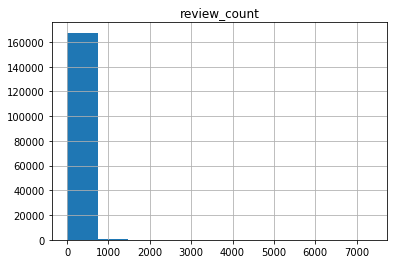

In [378]:
df_business_base.hist('review_count')

In [379]:
print(df_business_base['review_count'].value_counts())

3       30612
4       16281
5       12306
6        9694
7        7997
8        6507
9        5667
10       4845
11       4240
12       3756
13       3468
14       2914
15       2739
16       2466
17       2242
18       2095
19       1942
20       1749
21       1662
22       1514
23       1461
24       1360
25       1341
26       1170
27       1152
28       1052
29       1044
30        994
31        888
32        878
        ...  
977         1
427         1
935         1
679         1
3284        1
1238        1
857         1
2594        1
729         1
675         1
1315        1
548         1
4774        1
3621        1
472         1
2393        1
1495        1
1111        1
677         1
805         1
1061        1
2215        1
599         1
471         1
1494        1
678         1
806         1
934         1
1190        1
3838        1
Name: review_count, Length: 1060, dtype: int64


0.060693366350778606

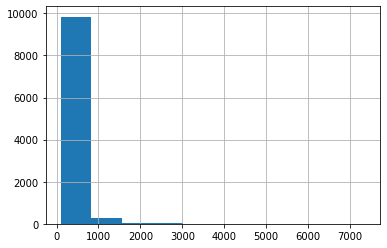

In [380]:
# 6% of the business has reviews more than 100
df_business_base['review_count'][(df_business_base['review_count']>100)].hist()
len(df_business_base['review_count'][(df_business_base['review_count']>100)])/len(df_business_base['review_count'])

0.38029787132720605

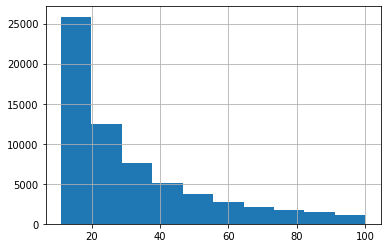

In [381]:
# 38% of the business has reviews more than 100
df_business_base['review_count'][(df_business_base['review_count']>10) & (df_business_base['review_count']<=100)].hist()
len(df_business_base['review_count'][(df_business_base['review_count']>10) & (df_business_base['review_count']<=100)])/len(df_business_base['review_count'])

0.5590087623220154

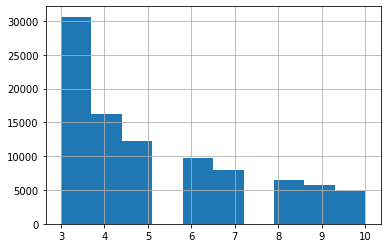

In [382]:
# 55.9% of the business has reviews less than or equal to 10
df_business_base['review_count'][df_business_base['review_count']<=10].hist()
len(df_business_base['review_count'][df_business_base['review_count']<=10])/len(df_business_base['review_count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E04293C940>]],
      dtype=object)

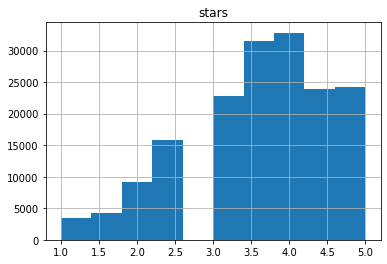

In [383]:
df_business_base.hist('stars')

In [384]:
for i in np.arange(1.0,5.0,0.5):
    print(i,':')
    print((len(df_business_base['stars'][df_business_base['stars']==float(i)]) / len(df_business_base['stars']))*100,'%')

1.0 :
2.0935520739082816 %
1.5 :
2.4941663888756604 %
2.0 :
5.447878470403353 %
2.5 :
9.423663031572932 %
3.0 :
13.603623982094385 %
3.5 :
18.74910710033811 %
4.0 :
19.54497833230154 %
4.5 :
14.229844278298968 %


In [385]:
#Let's use folium to visualize geo data
import folium
import os
from folium.plugins import MiniMap
import matplotlib.pyplot as plt
import numpy
import matplotlib

In [386]:
attr = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')
tiles = 'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'

test_point = folium.Map(location=[df_business_base.latitude[1],df_business_base.longitude[1]],tiles=tiles, attr=attr,zoom_start = 14)
folium.Marker(
    location=[df_business_base.latitude[1],df_business_base.longitude[1]],
    popup=('business_name: '+df_business_base.name[1]+'\nstate: '+df_business_base.state[1]+'\naddress: '+df_business_base.address[1]+'\ncity: '+df_business_base.city[1]),
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(test_point)
minimap = MiniMap(toggle_display=True,position='bottomright',width=200,height=200,zoom_level_offset=-8)
minimap.add_to(test_point)
test_point.save(os.path.join('results', 'test_point.html'))

![test_point.html](results\001.PNG)

In [387]:
#The result is correct
print('business_name: ',df_business_base.name[1],'\nstate: ',df_business_base.state[1],'\naddress: ',df_business_base.address[1],'\ncity: ',df_business_base.city[1])

business_name:  Stephen Szabo Salon 
state:  PA 
address:  3101 Washington Rd 
city:  McMurray


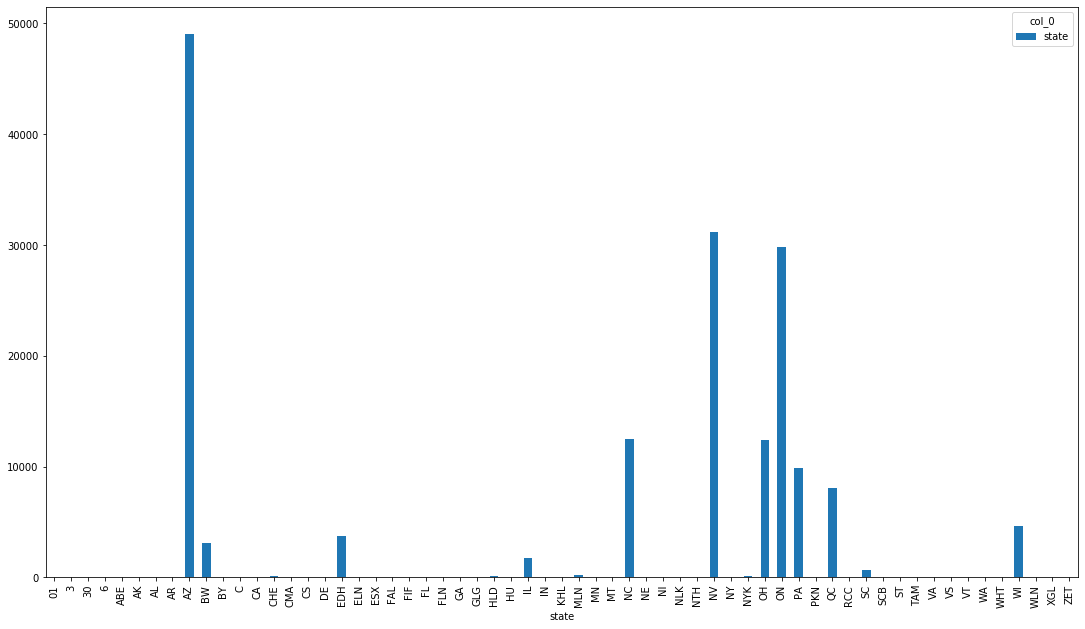

In [388]:
## Visualize all point
my_tab = pd.crosstab(index = df_business_base["state"],  # Make a crosstab
                              columns="state")      # Name the count column

my_tab.plot.bar()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [389]:
#Lets extract all the data of AZ and make a new data frame called df_AZ
df_AZ = df_business_base.loc[df_business_base['state']=='AZ']
df_AZ.head(10)

,business_id,name,postal_code,latitude,categories,review_count,state,address,city,stars,longitude,neighborhood,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,is_open
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,85044,33.330690,"[u'Dentists', u'General Dentistry', u'Health &...",22,AZ,"4855 E Warner Rd, Ste B9",Ahwatukee,4.0,-111.978599,unknown,7:30-17:00,7:30-17:00,7:30-17:00,7:30-17:00,7:30-17:00,9:00-17:01,0:00-0:01,1
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,85017,33.524903,"[u'Departments of Motor Vehicles', u'Public Se...",18,AZ,"6025 N 27th Ave, Ste 1",Phoenix,1.5,-112.115310,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,1
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,85282,33.383147,"[u'Sporting Goods', u'Shopping']",9,AZ,"5000 Arizona Mills Cr, Ste 435",Tempe,3.0,-111.964725,unknown,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,11:00-19:00,0
11,Y0eMNa5C-YU1RQOZf9XvVA,CubeSmart Self Storage,85286,33.271720,"[u'Local Services', u'Self Storage']",23,AZ,2414 South Gilbert Road,Chandler,5.0,-111.791257,unknown,9:30-18:00,9:30-18:00,9:30-18:00,9:30-18:00,9:30-18:00,8:30-17:30,11:00-15:00,1
16,IQSlT5jGE6CCDhSG0zG3xg,T & Y Nail Spa,85381,33.608654,"[u'Beauty & Spas', u'Nail Salons']",20,AZ,"8411 W Thunderbird Rd, Unit 101",Peoria,3.0,-112.240012,unknown,9:00-19:00,9:00-19:00,9:00-19:00,9:00-19:00,9:00-19:00,9:00-18:00,10:00-17:00,1
18,0FMKDOU8TJT1x87OKYGDTg,Senior's Barber Shop,85395,33.463629,"[u'Barbers', u'Beauty & Spas']",65,AZ,13375 W McDowell,Goodyear,5.0,-112.347038,unknown,9:00-18:00,9:00-18:00,9:00-18:00,9:00-18:00,9:00-19:00,9:00-18:00,0:00-0:01,1
21,94KziT6DQ9XlBET3WzIv_w,Fye,85204,33.380133,"[u'Shopping', u'Books', u'Mags', u'Music & Vid...",4,AZ,1928 S Gilbert Rd,Mesa,4.5,-111.788768,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,0
22,7YIy1tXOor9VCwvaSjuBHg,TSA Checkpoint T-4 A - Phoenix Sky Harbor Inte...,85034,33.435463,[u'Public Services & Government'],46,AZ,3400 E Sky Harbor Blvd,Phoenix,1.5,-112.006989,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,1
31,zzMu-6SmqhpvHxVRM6tx9g,Good Brakes Automotive,85022,33.600877,"[u'Oil Change Stations', u'Smog Check Stations...",5,AZ,"12614 N Cave Creek Rd, Ste 104",Phoenix,4.0,-112.037685,unknown,7:00-17:30,7:00-17:30,7:00-17:30,7:00-17:30,7:00-17:30,9:00-17:01,0:00-0:01,1
36,ok38fApaT1TBEU-IH85BvA,Kool Pool Care & Repair,85086,33.803900,"[u'Home Services', u'Contractors', u'Pool & Ho...",5,AZ,3245 W Florimond Rd,Phoenix,5.0,-112.130405,unknown,9:00-18:00,9:00-18:00,9:00-18:00,9:00-18:00,9:00-18:00,9:00-12:00,0:00-0:01,1


In [390]:
df_AZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49063 entries, 0 to 174566
Data columns (total 20 columns):
business_id        49063 non-null object
name               49063 non-null object
postal_code        49063 non-null object
latitude           49063 non-null float64
categories         49063 non-null object
review_count       49063 non-null int64
state              49063 non-null object
address            49063 non-null object
city               49063 non-null object
stars              49063 non-null float64
longitude          49063 non-null float64
neighborhood       49063 non-null object
hours.Monday       49063 non-null object
hours.Tuesday      49063 non-null object
hours.Wednesday    49063 non-null object
hours.Thursday     49063 non-null object
hours.Friday       49063 non-null object
hours.Saturday     49063 non-null object
hours.Sunday       49063 non-null object
is_open            49063 non-null int64
dtypes: float64(3), int64(2), object(15)
memory usage: 7.9+ MB


In [398]:
from folium.plugins import MarkerCluster
longs = np.array(df_AZ.longitude[0:18000])
longs=longs.astype(np.float64)
lats = np.array(df_AZ.latitude[0:18000])
lats=lats.astype(np.float64)
locations = list(zip(lats, longs))

In [399]:
name = np.array(df_AZ.name[0:18000])
stars = np.array(df_AZ.stars[0:18000])
pop = list(zip(name, stars))
popups = ['name:{}<br>stars:{}'.format(name, stars) for (name, stars) in pop]

In [400]:
attr = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')
tiles = 'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'

az = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    tiles=tiles, attr=attr,
    zoom_start=10
)

marker_cluster = MarkerCluster(
    name='Yelp Arizona',
    overlay=True,
    control=False,
    icon_create_function=None
)

for k in range(18000):
    location = lats[k], longs[k]
    marker = folium.Marker(location=location)
    popup = popups[k]
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(az)

folium.LayerControl().add_to(az)
az.save(os.path.join('results', 'Yelp_Arizona01.html'))

![Yelp_Arizona01.html](results\002.PNG)

In [401]:
longs = np.array(df_AZ.longitude[18001:36000])
longs=longs.astype(np.float64)
lats = np.array(df_AZ.latitude[18001:36000])
lats=lats.astype(np.float64)
locations = list(zip(lats, longs))
name = np.array(df_AZ.name[18001:36000])
stars = np.array(df_AZ.stars[18001:36000])
pop = list(zip(name, stars))
popups = ['name:{}<br>stars:{}'.format(name, stars) for (name, stars) in pop]

In [402]:
attr = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')
tiles = 'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'

az = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    tiles=tiles, attr=attr,
    zoom_start=10
)

marker_cluster = MarkerCluster(
    name='Yelp Arizona',
    overlay=True,
    control=False,
    icon_create_function=None
)

for k in range(17999):
    location = lats[k], longs[k]
    marker = folium.Marker(location=location)
    popup = popups[k]
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(az)

folium.LayerControl().add_to(az)
az.save(os.path.join('results', 'Yelp_Arizona02.html'))

![Yelp_Arizona02.html](results\003.PNG)

In [403]:
longs = np.array(df_AZ.longitude[36001:49063])
longs=longs.astype(np.float64)
lats = np.array(df_AZ.latitude[36001:49063])
lats=lats.astype(np.float64)
locations = list(zip(lats, longs))
name = np.array(df_AZ.name[36001:49063])
stars = np.array(df_AZ.stars[36001:49063])
pop = list(zip(name, stars))
popups = ['name:{}<br>stars:{}'.format(name, stars) for (name, stars) in pop]

In [404]:
attr = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')
tiles = 'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'

az = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    tiles=tiles, attr=attr,
    zoom_start=10
)

marker_cluster = MarkerCluster(
    name='Yelp Arizona',
    overlay=True,
    control=False,
    icon_create_function=None
)

for k in range(13062):
    location = lats[k], longs[k]
    marker = folium.Marker(location=location)
    popup = popups[k]
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(az)

folium.LayerControl().add_to(az)
az.save(os.path.join('results', 'Yelp_Arizona03.html'))

![Yelp_Arizona03.html](results\004.PNG)

In [432]:
#'Ghost Armor','Le Premier Hair Extensions & Service', 'Silver Bay Property Corp.', 'Albertsons', 'Academy Mortgage - The Woodlands',
#'Don Rubens','Ultimate Carpet Repair', 'Vapor Grande - Mesa', 'Las Vegas Highrollers', 'Paddle To the Core',
#'Travis Jackson - Wells Fargo Home Mortgage', 'iBrand Your Business'

In [416]:
df_AZ[df_AZ.name == 'Ghost Armor']

,business_id,name,postal_code,latitude,categories,review_count,state,address,city,stars,longitude,neighborhood,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,is_open
5981,UvKoGBUCrzI1TmAIVu9VYw,Ghost Armor,85281,33.432972,"[u'Electronics', u'Shopping']",5,AZ,2000 E Rio Salado Pkwy,Tempe,1.5,-111.904303,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,0
19848,qE7EmIReJmcvmorgA6xC7Q,Ghost Armor,85226,33.301470,"[u'Electronics', u'Professional Services', u'L...",6,AZ,3111 W Chandler Blvd,Chandler,4.5,-111.898406,unknown,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,11:00-18:00,1
44213,IK-VrSnhdzo56HFPaf-VZA,Ghost Armor,85308,33.641537,"[u'Shopping', u'Mobile Phones']",6,AZ,7700 W Arrowhead Towne Ctr,Glendale,4.0,-112.226423,unknown,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,11:00-18:00,1
64359,xcqgjUVHDCzAN4BTS5hzUg,Ghost Armor,85204,47.185378,"[u'Mobile Phones', u'Shopping']",3,AZ,952 E Baseline Rd Mesa,Mesa,3.5,-122.292897,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,0
76514,7nq6apIpwdm43IsprpooTg,Ghost Armor,85035,33.667579,"[u'IT Services & Computer Repair', u'Local Ser...",5,AZ,Desert Sky Mall,Phoenix,2.0,-112.014239,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,1
125437,UCkp__r8bCkfaKdCAdbkQw,Ghost Armor,85282,33.383147,"[u'Fashion', u'Electronics', u'Shopping', u'Mo...",12,AZ,5000 S Arizona Mills Cir,Tempe,2.0,-111.964725,unknown,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,10:00-21:00,11:00-18:00,1
163954,3QEb6Scfbzdy5QgNZFbjkA,Ghost Armor,85254,33.624638,"[u'Electronics', u'Shopping']",3,AZ,"15205 North Kierland Blvd, Ste 150",Scottsdale,2.5,-111.930343,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,0
166329,14hxuaJApFeVS6CKPUxqhg,Ghost Armor,85204,33.379680,"[u'Shopping', u'Electronics']",10,AZ,952 E Baseline Rd,Mesa,2.5,-111.810843,unknown,8:00-17:01,9:00-17:01,9:00-17:01,8:00-17:01,9:00-17:01,9:00-17:01,0:00-0:01,0


In [435]:
#The business id of outliers
#xcqgjUVHDCzAN4BTS5hzUg
#9YH4Bd-pz49lcgLRSG2Y3g
#2vLAd90hQnLjrW2p5r09oA
#HH-vg7ET2C1JQ2mpekRJTQ
#gZGsReG0VeX4uKViHTB9EQ
#0MAubmdZUjeCHlqy5nMuDw
#APKnmbYJp0mlfhQY97yQzQ
#23hNsQz1XYDv5qGkHsM5gQ
#vRWEXeTgEedOvwmTCJFulA
#T-nnccLDurMS1mrGirtR9A
#onFZnAudCT98F3KYMhZ3Iw

In [460]:
#Let's delete those outliers
df_AZ=df_AZ[~df_AZ.business_id.isin(['xcqgjUVHDCzAN4BTS5hzUg','9YH4Bd-pz49lcgLRSG2Y3g','2vLAd90hQnLjrW2p5r09oA','HH-vg7ET2C1JQ2mpekRJTQ','gZGsReG0VeX4uKViHTB9EQ','0MAubmdZUjeCHlqy5nMuDw','APKnmbYJp0mlfhQY97yQzQ','23hNsQz1XYDv5qGkHsM5gQ','vRWEXeTgEedOvwmTCJFulA','T-nnccLDurMS1mrGirtR9A','onFZnAudCT98F3KYMhZ3Iw'])]
df_AZ.to_csv('df_AZ.csv')

#### (2) Read checkin.csv

#### Fill NaNs and join the name of the business

In [406]:
df_checkin = pd.read_csv('C:/Users/ymp/Yelp_Business_Proj/checkin.csv')
df_checkin.head(3)

,business_id,Mon_0:00,Mon_1:00,Mon_2:00,Mon_3:00,Mon_4:00,Mon_5:00,Mon_6:00,Mon_7:00,Mon_8:00,...,Sun_14:00,Sun_15:00,Sun_16:00,Sun_17:00,Sun_18:00,Sun_19:00,Sun_20:00,Sun_21:00,Sun_22:00,Sun_23:00
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,1.0,2.0,5.0,1.0,NaN,1.0
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,tJRDll5yqpZwehenzE2cSg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
df_checkin = df_checkin.where(df_checkin.notnull(),0)
df_checkin.head(3)

,business_id,Mon_0:00,Mon_1:00,Mon_2:00,Mon_3:00,Mon_4:00,Mon_5:00,Mon_6:00,Mon_7:00,Mon_8:00,...,Sun_14:00,Sun_15:00,Sun_16:00,Sun_17:00,Sun_18:00,Sun_19:00,Sun_20:00,Sun_21:00,Sun_22:00,Sun_23:00
0,7KPBkxAOEtb3QeIL9PEErg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0
1,kREVIrSBbtqBhIYkTccQUg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,tJRDll5yqpZwehenzE2cSg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [408]:
df_business_name = df_business[['business_id','name']]
df_business_name.head(3)

,business_id,name
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle


In [409]:
df_checkin_withName = df_checkin.merge(df_business_name,on='business_id',how='outer')
df_checkin_withName.head(3)

,business_id,Mon_0:00,Mon_1:00,Mon_2:00,Mon_3:00,Mon_4:00,Mon_5:00,Mon_6:00,Mon_7:00,Mon_8:00,...,Sun_15:00,Sun_16:00,Sun_17:00,Sun_18:00,Sun_19:00,Sun_20:00,Sun_21:00,Sun_22:00,Sun_23:00,name
0,7KPBkxAOEtb3QeIL9PEErg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,QuikTrip
1,kREVIrSBbtqBhIYkTccQUg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Richard Petty Driving Experience
2,tJRDll5yqpZwehenzE2cSg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ransom Bay Inn B & B


In [410]:
df_checkin_withName.to_csv('df_checkin_withName.csv')

#### (3) Read review.csv

In [453]:
df_review = pd.read_csv('C:/Users/ymp/Yelp_Business_Proj/review.csv')
df_review.head(3)
for col in df_review.columns:
        print(col,':')
        print('NaNs: ',df_review[col].isna().sum())

funny :
NaNs:  0
user_id :
NaNs:  0
review_id :
NaNs:  0
text :
NaNs:  0
business_id :
NaNs:  0
stars :
NaNs:  0
date :
NaNs:  0
useful :
NaNs:  0
cool :
NaNs:  0


In [454]:
df_review.to_csv('df_review.csv')

#### (4) Read tip.csv

In [450]:
df_tip = pd.read_csv('C:/Users/ymp/Yelp_Business_Proj/tip.csv')
df_tip.head(3)
for col in df_tip.columns:
        print(col,':')
        print('NaNs: ',df_tip[col].isna().sum())

user_id :
NaNs:  0
text :
NaNs:  1
business_id :
NaNs:  0
likes :
NaNs:  0
date :
NaNs:  0


In [451]:
df_tip=df_tip.dropna(axis=0,how='any')

In [452]:
df_tip.to_csv('df_tip.csv')

#### (5) Read user.csv

In [444]:
df_user = pd.read_csv('C:/Users/ymp/Yelp_Business_Proj/user.csv')
for col in df_user.columns:
        print(col,':')
        print('NaNs: ',df_user[col].isna().sum())

yelping_since :
NaNs:  0
useful :
NaNs:  0
compliment_photos :
NaNs:  0
compliment_list :
NaNs:  0
compliment_funny :
NaNs:  0
compliment_plain :
NaNs:  0
review_count :
NaNs:  0
elite :
NaNs:  0
fans :
NaNs:  0
compliment_note :
NaNs:  0
funny :
NaNs:  0
compliment_writer :
NaNs:  0
compliment_cute :
NaNs:  0
average_stars :
NaNs:  0
user_id :
NaNs:  0
compliment_more :
NaNs:  0
friends :
NaNs:  0
compliment_hot :
NaNs:  0
cool :
NaNs:  0
name :
NaNs:  497
compliment_profile :
NaNs:  0
compliment_cool :
NaNs:  0


In [445]:
df_user.head(3)

,yelping_since,useful,compliment_photos,compliment_list,compliment_funny,compliment_plain,review_count,elite,fans,compliment_note,...,compliment_cute,average_stars,user_id,compliment_more,friends,compliment_hot,cool,name,compliment_profile,compliment_cool
0,2014-11-03,0,0,0,0,1,8,[],0,0,...,0,4.67,oMy_rEb0UBEmMlu-zcxnoQ,0,"[u'cvVMmlU1ouS3I5fhutaryQ', u'nj6UZ8tdGo8YJ9lU...",0,0,Johnny,0,0
1,2013-09-24,0,0,0,0,0,10,[],0,0,...,0,3.70,JJ-aSuM4pCFPdkfoZ34q0Q,0,"[u'0njfJmB-7n84DlIgUByCNw', u'rFn3Xe3RqHxRSxWO...",0,0,Chris,0,0
2,2017-03-02,0,0,0,0,0,1,[],0,0,...,0,2.00,uUzsFQn_6cXDh6rPNGbIFA,0,[],0,0,Tiffy,0,0


In [447]:
df_user['name'] = df_user['name'].fillna('Anonymous')
print(df_user['name'].value_counts())

John            11763
David           11193
Michael         11104
Chris           10081
Mike             9387
Jennifer         8487
Jessica          7528
Sarah            7091
Michelle         6916
Mark             6632
Lisa             6396
Jason            6347
Brian            6313
James            5998
Robert           5652
J                5626
Kevin            5560
Steve            5523
Ashley           5487
Ryan             5412
Stephanie        5273
Jeff             5259
Amy              5193
Amanda           5192
Matt             5137
Melissa          5108
Scott            5107
Alex             5093
Eric             4999
Joe              4876
                ...  
Ashley AtThe        1
ionamorri           1
DuWane              1
Blanka              1
Gradieh             1
Meskerem            1
Faedra              1
Maddysen            1
Desiree Ann         1
Gennive             1
Yaovared            1
Sonias              1
Kevin B             1
Brandinn            1
Xylena    

In [449]:
for col in df_user.columns:
        print(col,':')
        print('NaNs: ',df_user[col].isna().sum())

yelping_since :
NaNs:  0
useful :
NaNs:  0
compliment_photos :
NaNs:  0
compliment_list :
NaNs:  0
compliment_funny :
NaNs:  0
compliment_plain :
NaNs:  0
review_count :
NaNs:  0
elite :
NaNs:  0
fans :
NaNs:  0
compliment_note :
NaNs:  0
funny :
NaNs:  0
compliment_writer :
NaNs:  0
compliment_cute :
NaNs:  0
average_stars :
NaNs:  0
user_id :
NaNs:  0
compliment_more :
NaNs:  0
friends :
NaNs:  0
compliment_hot :
NaNs:  0
cool :
NaNs:  0
name :
NaNs:  0
compliment_profile :
NaNs:  0
compliment_cool :
NaNs:  0


In [86]:
df_user.to_csv('df_user.csv')

# (6) Final data for experiments

In [2]:
# In the end I decide to use the df_AZ as the final dataset, meanwhile, we need to combine the 
# reviews with the df_AZ and also we limit the date after 2015-1-1

In [461]:
df_AZ = pd.read_csv('df_AZ.csv')

In [463]:
business_features = ['business_id','name','latitude','longitude','review_count','city','stars','categories']
df_AZ = df_AZ[business_featurs]
df_AZ = df_AZ[["Restaurants" in category for category in df_AZ['categories']]]
df_AZ.head(3)

,business_id,name,latitude,longitude,review_count,city,stars,categories
12,rDMptJYWtnMhpQu_rRXHng,McDonald's,33.607070,-112.064382,10,Phoenix,1.0,"['Fast Food', 'Burgers', 'Restaurants']"
13,1WBkAuQg81kokZIPMpn9Zg,Charr An American Burger Bar,33.607310,-112.063404,232,Phoenix,3.0,"['Burgers', 'Restaurants']"
16,iPa__LOhse-hobC2Xmp-Kw,McDonald's,33.508765,-112.046240,34,Phoenix,3.0,"['Restaurants', 'Burgers', 'Fast Food']"


In [475]:
#because df_AZ and reviews both have feature 'stars', let's change the df_AZ's to 'average_stars'
df_AZ = df_AZ.rename(columns = {'stars':'average_stars'})

In [476]:
df_final = df_AZ.set_index('business_id').join(df_review.set_index('business_id'),how='left')
df_final = df_final.reset_index()
# Selects data after 2015-01-01
df_final['date'] = pd.to_datetime(df_final['date'], format = "%Y-%m-%d")
df_final = df_final[df_final['date'] > pd.to_datetime("2015-01-01", format = "%Y-%m-%d")]
df_final.head(2)
df_final.to_csv('df_AZ_final.csv')

In [471]:
df_final.head(3)

,business_id,name,latitude,longitude,review_count,city,averageg_stars,categories,funny,user_id,review_id,text,stars,date,useful,cool
24,-01XupAWZEXbdNbxNg5mEg,18 Degrees Neighborhood Grill,33.639205,-111.881925,77,Scottsdale,3.0,"['Sports Bars', 'Nightlife', 'Restaurants', 'A...",1,-XoCb6sUMa7NoFayUW0FlA,Z7ufB8dFZ_9VjkcntOEsig,Horrible! Had the happy hour nachos. The che...,1,2016-09-03,2,0
26,-01XupAWZEXbdNbxNg5mEg,18 Degrees Neighborhood Grill,33.639205,-111.881925,77,Scottsdale,3.0,"['Sports Bars', 'Nightlife', 'Restaurants', 'A...",0,TqZOtEPp28bHyHyfkXonNw,pK6q9LKp1W1qQ0boE6kcsA,not bad for a hockey rink.....very good service,4,2017-04-05,0,0
27,-01XupAWZEXbdNbxNg5mEg,18 Degrees Neighborhood Grill,33.639205,-111.881925,77,Scottsdale,3.0,"['Sports Bars', 'Nightlife', 'Restaurants', 'A...",0,o0yk9cD97rPqsNCcb4DBFQ,RjIl7CW18ZYoUZkAdLHYig,"Went to this little place on Groupon, not one ...",1,2017-04-12,0,0
